<a href="https://colab.research.google.com/github/Ayobamijeje/curenetics_test/blob/model_training_branch/currenetics_trainedmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Curenetic Sentiment Analysis


#### Load data
#### Data cleaning and visualisation
#### Generate data for data augmentationn using transformers and nltk
#### Model pipeline for ML text transformation
#### Train Modoel - DL and Logistic regression
#### Save best model  

In [97]:
## Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
data  = pd.read_csv('/content/feedback_data.csv')


In [3]:
data.head(10)

,Feedback,Sentiment
0,The information was very helpful and easy to n...,Positive
1,I found the website confusing and hard to use.,Negative
2,"Great job on the user interface, very intuitive!",Positive
3,The page loads are too slow and it frustrates ...,Negative
4,Thanks for providing up-to-date information!,Positive
5,"I hate the layout, it makes no sense at all.",Negative
6,"Excellent customer service, my issue was resol...",Positive
7,"The form submission failed multiple times, cal...",Negative
8,Very informative site with all the resources I...,Positive
9,I couldn't find the contact information I was ...,Negative


In [4]:
# 2 columns, 51 row, string data, no null

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Feedback   51 non-null     object
 1   Sentiment  51 non-null     object
dtypes: object(2)
memory usage: 948.0+ bytes


Text(0.5, 1.0, 'Sentiment review')

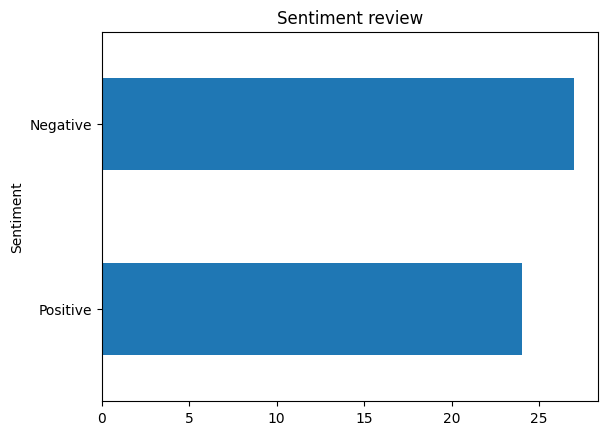

In [5]:
#Neg 27, Pos 24
data['Sentiment'].value_counts().plot(kind = 'barh').invert_yaxis()
plt.title('Sentiment review')

In [6]:
# No of words - 520
lst_text = data['Feedback'].str.cat(sep=',').split(' ')
print(len(lst_text))


520


Text(0.5, 1.0, 'First 10 words')

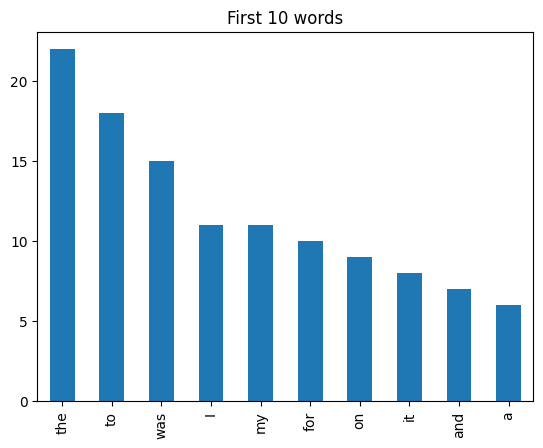

In [7]:
# stopwords are encompase majority of the text
pd.Series(lst_text).value_counts()[:10].plot(kind = 'bar')
plt.title('First 10 words')

#### Text Augmentation


In [8]:
import nltk
import random
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to get synonyms
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            name = lemma.name().replace("_", " ").lower()
            if name != word:
                synonyms.add(name)
    return list(synonyms)

# Basic synonym replacement
def augment_sentence(sentence, n=1):
    words = sentence.split()
    new_sentences = []
    for _ in range(n):
        new_words = words.copy()
        for i, word in enumerate(new_words):
            syns = get_synonyms(word)
            if syns:
                new_words[i] = random.choice(syns)
        new_sentences.append(' '.join(new_words))
    return ' '.join(new_sentences)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [9]:
exp1 = data['Feedback'][:10].apply(lambda x : augment_sentence(x))
print(exp1)
print('------------------')
print(data['Feedback'][:10])

0    The entropy washington really helpful and well...
1    one receive the site obnubilate and backbreaki...
2    slap-up farm out along the substance abuser in...
3    The sir frederick handley page stretch constit...
4             thanks for ply cutting-edge information!
5    ace hatred the layout, information technology ...
6    splendid client service, my offspring cost dis...
7    The descriptor compliance betray multiple time...
8    really illuminating place with entirely the im...
9    one couldn't line up the meet data ace embody ...
Name: Feedback, dtype: object
------------------
0    The information was very helpful and easy to n...
1       I found the website confusing and hard to use.
2     Great job on the user interface, very intuitive!
3    The page loads are too slow and it frustrates ...
4         Thanks for providing up-to-date information!
5         I hate the layout, it makes no sense at all.
6    Excellent customer service, my issue was resol...
7    The form su

In [10]:
from transformers import pipeline

paraphraser = pipeline(
    "text2text-generation",
    model="Vamsi/T5_Paraphrase_Paws",
    tokenizer="Vamsi/T5_Paraphrase_Paws"
)

def augment_sentence02(text, num_return_sequences=1):
    prompt = f"paraphrase: {text} </s>"
    results = paraphraser(
        prompt,
        max_length=30,
        num_return_sequences=num_return_sequences,
        do_sample=True,
        top_k=100,
        top_p=0.90
    )
    return ' '.join([r['generated_text'] for r in results])


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Device set to use cpu


In [11]:
exp2 = data['Feedback'][:10].apply(lambda x : augment_sentence02(x))
print(exp2)
print('------------------')
print(data['Feedback'][:10])


Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

0    The information was very helpful and easy to n...
1    I found the website confusing and difficult to...
2     Great job on the user interface, very intuitive!
3    The page loads are too slow and it frustrates ...
4         Thanks for providing up-to-date information!
5         I hate the layout, it makes no sense at all.
6    Excellent customer service, my issue was quick...
7    The submission of the form failed multiple tim...
8    Very informative site with all the resources I...
9    I couldn't find the contact information I was ...
Name: Feedback, dtype: object
------------------
0    The information was very helpful and easy to n...
1       I found the website confusing and hard to use.
2     Great job on the user interface, very intuitive!
3    The page loads are too slow and it frustrates ...
4         Thanks for providing up-to-date information!
5         I hate the layout, it makes no sense at all.
6    Excellent customer service, my issue was resol...
7    The form su

In [12]:
data['aug_sentence1'] = data['Feedback'].apply(lambda x : (augment_sentence(x)))

data['aug_sentence2'] = data['Feedback'].apply(lambda x : (augment_sentence02(x)))


data


Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

,Feedback,Sentiment,aug_sentence1,aug_sentence2
0,The information was very helpful and easy to n...,Positive,The data constitute selfsame helpful and leisu...,The information was very helpful and easy to n...
1,I found the website confusing and hard to use.,Negative,one obtain the site throw and intemperate to use.,I found the website confusing and difficult to...
2,"Great job on the user interface, very intuitive!",Positive,"peachy chore along the exploiter interface, re...","Great job on the user interface, very intuitive!"
3,The page loads are too slow and it frustrates ...,Negative,The pageboy lashings follow besides tiresome a...,The page loads are too slow and it frustrates ...
4,Thanks for providing up-to-date information!,Positive,thank for render with-it information!,Thanks for providing up-to-date information!
5,"I hate the layout, it makes no sense at all.",Negative,"unity hatred the layout, information technolog...","I hate the layout, it makes no sense at all."
6,"Excellent customer service, my issue was resol...",Positive,"first-class client service, my number constitu...","Excellent customer service, my issue was quick..."
7,"The form submission failed multiple times, cal...",Negative,"The physique entry give way multiple times, cr...",The submission of the form failed multiple tim...
8,Very informative site with all the resources I...,Positive,rattling enlightening land site with completel...,Very informative site with all the resources I...
9,I couldn't find the contact information I was ...,Negative,one couldn't get the contact lens data one eve...,I couldn't find the contact information I was ...


In [13]:
data01 = data[['aug_sentence1', 'Sentiment']]
data02 = data[['aug_sentence2', 'Sentiment']]

data01.rename(columns = {'aug_sentence1':'Feedback'}, inplace = True)
data02.rename(columns = {'aug_sentence2':'Feedback'}, inplace = True)



combine_data = pd.concat([data[['Feedback', 'Sentiment']], data01[['Feedback', 'Sentiment']]], ignore_index = True, axis = 0)
combine_data = pd.concat([combine_data[['Feedback', 'Sentiment']], data02[['Feedback', 'Sentiment']]], ignore_index = True, axis = 0)



/tmp/ipython-input-13-3760051172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data01.rename(columns = {'aug_sentence1':'Feedback'}, inplace = True)
/tmp/ipython-input-13-3760051172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data02.rename(columns = {'aug_sentence2':'Feedback'}, inplace = True)


In [14]:
combine_data
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Feedback   153 non-null    object
 1   Sentiment  153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [16]:
nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:

# Creating a function to remove stopwords
def remove_stopwords(text):
    s = []
    text = text.lower()
    for words in text.split():
        if words not in stopwords:
            s.append(words)
    a = s[:]
    s.clear()
    return ' '.join(a)

In [18]:
combine_data['FB_WSW'] = combine_data['Feedback'].apply(lambda x : remove_stopwords(x))

combine_data

,Feedback,Sentiment,FB_WSW
0,The information was very helpful and easy to n...,Positive,information helpful easy navigate.
1,I found the website confusing and hard to use.,Negative,found website confusing hard use.
2,"Great job on the user interface, very intuitive!",Positive,"great job user interface, intuitive!"
3,The page loads are too slow and it frustrates ...,Negative,page loads slow frustrates every time.
4,Thanks for providing up-to-date information!,Positive,thanks providing up-to-date information!
...,...,...,...
148,The help text next to the form fields was actu...,Negative,help text next form fields actually confusing ...
149,Sorting the search results by date published w...,Negative,sorting search results date published would us...
150,NOW BUY CHEAP DRUGS ONLINE www.fakepharma.biz,Negative,buy cheap drugs online www.fakepharma.biz
151,The page loads are too slow and it frustrates ...,Negative,page loads slow frustrates every time.


In [19]:
combine_data['FB_WSW'].apply(lambda x : len(x)).max()

133

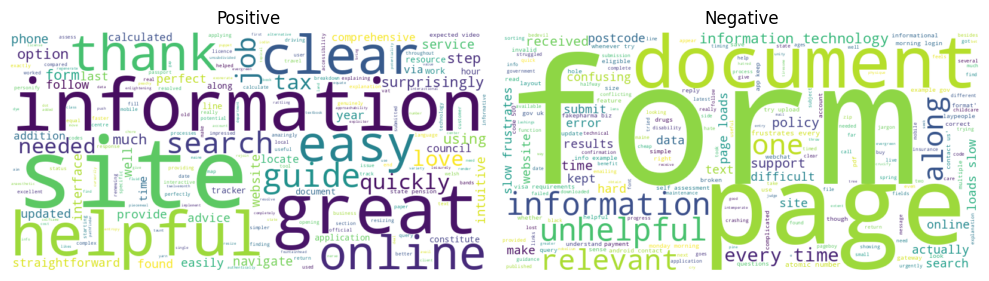

In [20]:

# Hint about words


plt.figure(figsize=(10, 30))

for dig, i in enumerate(combine_data['Sentiment'].unique()):
  text_data = " ".join(statement for statement in combine_data.loc[combine_data['Sentiment']== i, 'FB_WSW'])
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
  axes = plt.subplot(4, 2, dig + 1)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(i)


plt.tight_layout()
plt.subplots_adjust(hspace = -0.8)

plt.show()

### ML text pipiline - text_vectorization
### tf text_vectorization  create a pipleline to hand texts helps to raw_text → standardized → tokenized → mapped to if_idf → padded


In [21]:
# Sentiment to number
combine_data['label'], names = pd.factorize(combine_data['Sentiment'])# generating label encoder



In [22]:
X = combine_data['FB_WSW']
y = combine_data['label']

# Perform stratified split: 80% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)


# Combine the split data back into DataFrames for easier handling later
train_dataset = pd.DataFrame({'FB_WSW': X_train, 'label': y_train})
val_dataset = pd.DataFrame({'FB_WSW': X_val, 'label': y_val})


In [23]:
train_dataset.to_csv('train_pandas.csv', index=False)


In [24]:
train_dataset_ = tf.data.Dataset.from_tensor_slices((train_dataset['FB_WSW'].values, train_dataset['label'].values))
val_dataset_ = tf.data.Dataset.from_tensor_slices((val_dataset['FB_WSW'].values, val_dataset['label'].values))

train_ds = train_dataset_.shuffle(buffer_size=16).batch(16)
val_ds = val_dataset_.shuffle(buffer_size=16).batch(16)


In [25]:
for i, j in train_dataset_.take(1):## remove
  print(i.shape)

()


In [26]:
from tensorflow.keras import layers

max_length = 200
max_tokens = 15000
text_vectorization = layers.TextVectorization(
    ngrams=2,
    max_tokens=max_tokens,
    output_mode="tf_idf")
 # text_vectorization apply lower() and removing punctuations from the data

text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)

In [27]:
train_int = train_ds.map( lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
val_int = val_ds.map( lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)


In [28]:


vocab_size = len(text_vectorization.get_vocabulary())
vocab_size

1047

### DL model

In [53]:

def get_model(max_tokens=vocab_size, hidden_dim=3):
     inputs = keras.Input(shape=(vocab_size,))
     x = layers.Dense(hidden_dim, activation="relu")(inputs)
     x = layers.Dropout(0.5)(x)
     outputs = layers.Dense(1, activation="sigmoid")(x)
     model = keras.Model(inputs, outputs)

     model.compile(optimizer="rmsprop",
     loss="binary_crossentropy",
     metrics=["accuracy"])
     return model

In [54]:
model = get_model()
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 1047)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │         3,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,148 (12.30 KB)

 Trainable params: 3,148 (12.30 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
callbacks = [
 keras.callbacks.ModelCheckpoint("/content/Curenetics.keras",
 save_best_only=True)
]

model.fit(train_int,
 validation_data=val_int,
 epochs=40,
 callbacks = callbacks)


Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7715 - loss: 0.4157 - val_accuracy: 0.7097 - val_loss: 0.4826
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7766 - loss: 0.3792 - val_accuracy: 0.7419 - val_loss: 0.4742
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7588 - loss: 0.4210 - val_accuracy: 0.7419 - val_loss: 0.4706
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7980 - loss: 0.4225 - val_accuracy: 0.7419 - val_loss: 0.4668
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7860 - loss: 0.3822 - val_accuracy: 0.7742 - val_loss: 0.4626
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8573 - loss: 0.3217 - val_accuracy: 0.7742 - val_loss: 0.4578
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8835 - loss: 0.3348 - val_accuracy: 0.7742 - val_loss: 0.4513
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8545 - loss: 0.3619 - val_accuracy: 0.7742 - val_loss: 0.4491


In [62]:
loaded_model = tf.keras.models.load_model('/content/Curenetics.keras')


In [66]:
texts = ['it makes no sense at all ', 'i hate Movies with sad ending', 'page loads slow frustrates every time', 'The form submission failed multiple times', 'found website confusing hard use', ' the display is horrible', 'Great site great site love it love it', 'i love you']


for text in texts:
  text = text_vectorization([text])
  predict = loaded_model.predict(text)
  if predict < 0.5:
      print('Positive')
  else:
      print('Negative')

  print(predict)
  #print(index_predict)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Positive
[[0.34803626]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Positive
[[0.34803626]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Negative
[[0.9736465]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Negative
[[0.871329]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Negative
[[0.9621934]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Positive
[[0.42664903]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Positive
[[0.01552911]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Positive
[[0.36478385]]


In [98]:
unbatched_test_ds = val_int.unbatch()

# Batch all examples at once for analysis
test_inputs, test_labels = [], []

for inputs, labels in unbatched_test_ds:
    test_inputs.append(inputs)
    test_labels.append(labels)

test_inputs = np.array(test_inputs)
test_labels = np.array(test_labels)



In [93]:



prediction = []
predict = loaded_model.predict(test_inputs)
for i in predict:
  if i < 0.5:
      prediction.append(0)
  else:
      prediction.append(1)


print("Accuary: ", accuracy_score(test_labels, prediction))
print(confusion_matrix(test_labels,prediction))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Accuary:  0.8064516129032258
[[15  0]
 [ 6 10]]


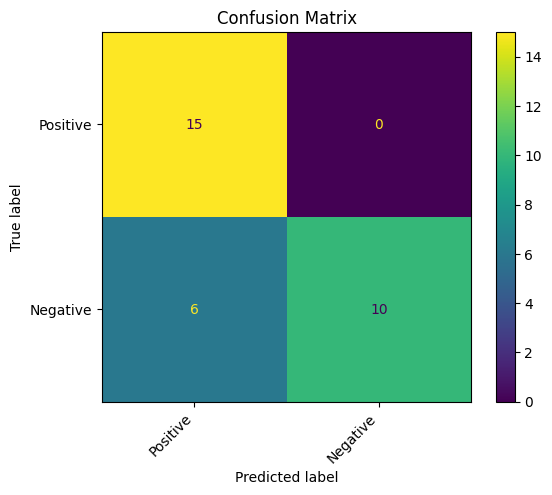

In [96]:
cm = confusion_matrix(test_labels, prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names[np.unique(test_labels)])
disp.plot(cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression


### tf dataset converted to np for logistic regression

In [99]:
import numpy as np

def dataset_to_numpy(datasets):
    X, y = [], []
    for batch_x, batch_y in datasets:
        X.append(batch_x.numpy())
        y.append(batch_y.numpy())
    return np.vstack(X), np.concatenate(y)

X_train, y_train = dataset_to_numpy(train_int)
X_val, y_val = dataset_to_numpy(val_int)



In [100]:
from sklearn.linear_model import LogisticRegression

sl_model = LogisticRegression(max_iter=20)
sl_model.fit(X_train, y_train)


LogisticRegression(max_iter=20)

In [101]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


prediction = sl_model.predict(X_train)

In [102]:
print("Accuary: ", accuracy_score(y_train, prediction))
print(confusion_matrix(y_train,prediction))



Accuary:  1.0
[[57  0]
 [ 0 65]]


In [103]:
prediction_val = sl_model.predict(X_val)

print("Accuary: ", accuracy_score(y_val, prediction_val))
print(confusion_matrix(y_val, prediction_val))



Accuary:  0.9354838709677419
[[15  0]
 [ 2 14]]


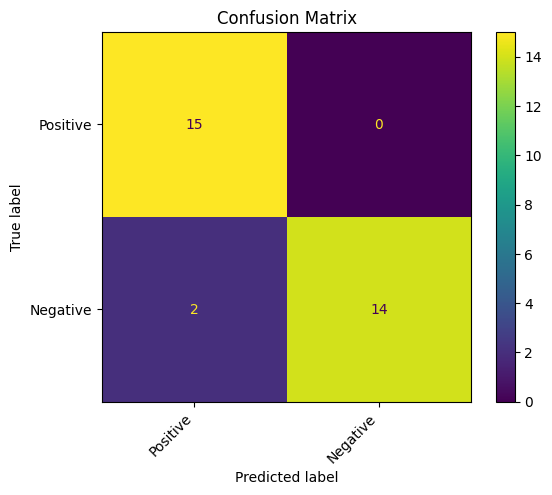

In [104]:
cm = confusion_matrix(y_val, prediction_val)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names[np.unique(y_val)])
disp.plot(cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()

In [184]:
import tensorflow as tf
import keras
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.18.0
Keras version: 3.8.0


## Summary

### Sentiment analysis trained with DL and logistic regress
### Augemented with transformer and nltk
### Logistic regression performed better likely due to very small dataset - DL Val_accuracy -80.3, logistic regression accuracy  - 93
### The DL  shows steady training accuracy around 80-87% and consistent validation accuracy at 77-81%, with gradually decreasing loss. This indicates stable learning and good generalization, though validation accuracy plateaus, suggesting further dataset may be needed to boost performance.
### Model used down stress for application